# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

K-Means Clustering adalah salah satu algoritma unsupervised learning yang paling populer dalam bidang data mining dan machine learning. Tujuan dari algoritma ini adalah untuk mengelompokkan sekumpulan data ke dalam sejumlah kelompok (cluster) berdasarkan kemiripan atau kedekatan karakteristiknya.
Disebut “K-Means” karena:

- K adalah jumlah cluster yang ingin dibentuk (ditentukan oleh pengguna),
dan Means merujuk pada metode rata-rata (mean) yang digunakan untuk menemukan pusat dari setiap cluster.


## **Manfaat *Clustering***
**1. Menemukan Pola Tersembunyi dalam Data**

Clustering membantu mengidentifikasi pola-pola alami dalam data yang tidak terlihat secara eksplisit. Ini berguna dalam eksplorasi data awal (exploratory data analysis).

**2. Segmentasi Data**

Clustering digunakan untuk membagi data besar menjadi kelompok-kelompok lebih kecil yang memiliki karakteristik serupa, misalnya:

- Segmentasi pelanggan berdasarkan perilaku belanja

- Segmentasi pasar atau wilayah geografis

**3. Reduksi Dimensi dan Ringkasan Data**

Dengan mengelompokkan data ke dalam beberapa cluster, kita bisa meringkas data yang besar dan kompleks menjadi representasi yang lebih sederhana (cluster centroid).

**4. Peningkatan Efisiensi Sistem**

Dalam sistem pencarian, rekomendasi, atau kompresi data, clustering dapat meningkatkan efisiensi karena hanya perlu memperhatikan representasi cluster, bukan seluruh dataset.

**5. Preprocessing untuk Algoritma Lain**

Clustering sering digunakan sebagai tahapan awal (preprocessing) untuk algoritma lain seperti:

- Classification (klasifikasi)

- Anomaly Detection (deteksi anomali)

- Recommendation System



## **Inertia (Sum Square Error/SSE)**

Inertia (Sum Square Error/SSE) adalah salah satu metrik yang digunakan untuk mengevaluasi hasil K-Means Clustering. Metrik ini mengukur total jarak kuadrat dari setiap titik data ke pusat klaster (centroid) klaster tempat data tersebut tergabung.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**

Silhouette Analysis adalah metrik evaluasi lain yang lebih baik dari inertia dalam banyak kasus untuk mengevaluasi hasil clustering, seperti pada K-Means, karena mempertimbangkan dua hal sekaligus yaitu:

- Kepadatan dalam klaster

- Jarak antar klaster

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## Implementasi dengan menggunakan data Iris

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.9 MB/s eta 0:00:00


## Library yang digunakan

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [5]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-292ef6f0-postgesql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_iFCt7xp02vTczdlhooY",
        database="defaultdb",
        port=16905
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM firmandani.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Fungsi untuk mengambil data dari MySQL
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-ef66224-mmsql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_NrOpqQJhytxwdcC6shv",
        database="defaultdb",
        port=21910
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa           1.3          0.2           5.1          3.5
  2     Iris-setosa         122.0        123.0         223.0        121.0
  3     Iris-setosa         234.0        241.0         121.0        142.0
  4     Iris-setosa         210.0        423.0         135.0       1423.0
  5     Iris-setosa         233.0        230.0         123.0        241.0
  6     Iris-setosa         201.0        221.0         521.0        123.0
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.0          0.2           5.0          3.4
  9     Iris-setosa           4.0          0.2           5.0          2.9
 10     Iris-setosa           1.5          0.3           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.3           4.8          3.4
 13     Iris-setosa           4.3     

## Data asli sebelum di normalisasi

Ini adalah data sebelum normalisasi

In [6]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal length  petal width  sepal length  sepal width
          1.3          0.2           5.1          3.5
        122.0        123.0         223.0        121.0
        234.0        241.0         121.0        142.0
        210.0        423.0         135.0       1423.0
        233.0        230.0         123.0        241.0
        201.0        221.0         521.0        123.0
          1.4          0.3           4.6          3.4
          1.0          0.2           5.0          3.4
          4.0          0.2           5.0          2.9
          1.5          0.3           4.9          3.1
          1.5          0.2           5.4          3.7
          1.6          0.3           4.8          3.4
          4.3          0.1           4.8          3.0
          7.5          0.1           4.3          3.0
          1.2          0.2           5.8          4.0
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

## Visualisasi data

### Visualisasi data asli tanpa menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

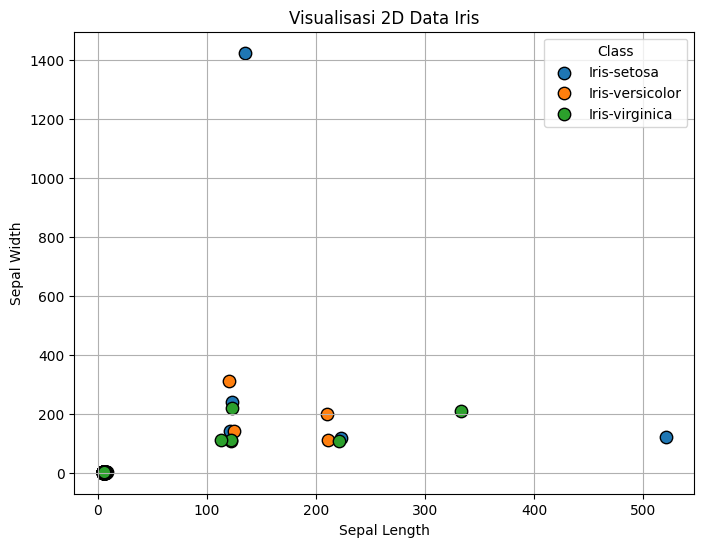

In [8]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


Ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

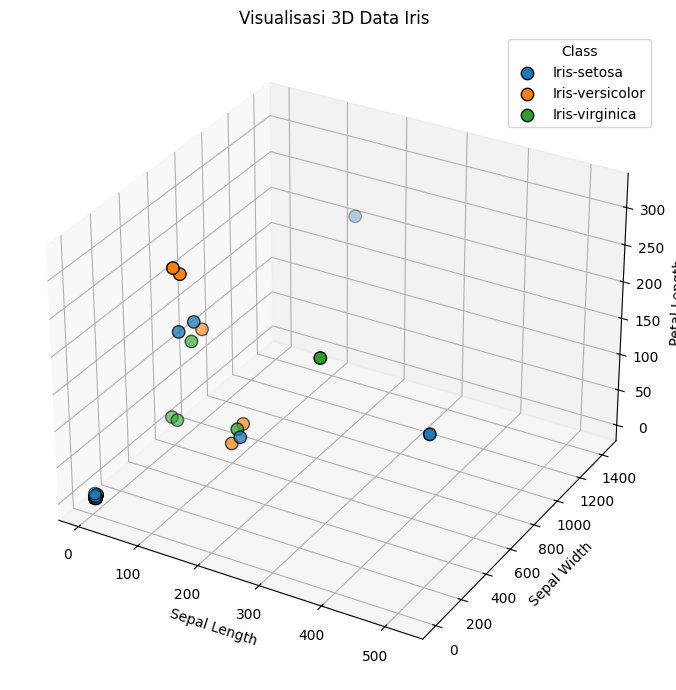

In [10]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal length'],
        subset['sepal width'],
        subset['petal length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi menggunakan PCA

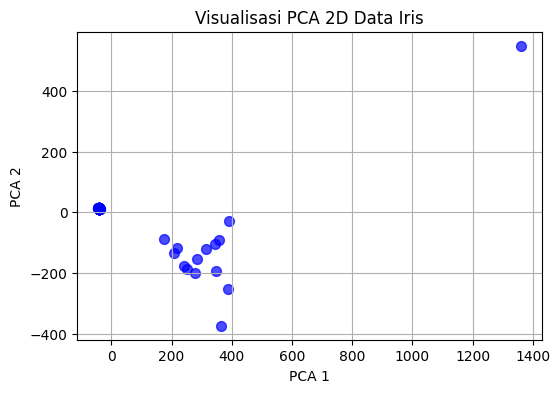

In [11]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi menggunakan PCA

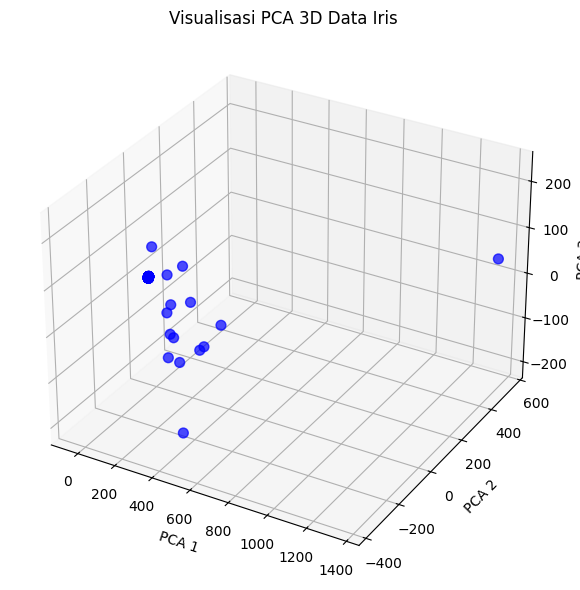

In [12]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler

Disini saya juga menerapkan normalisasi menggunakan MinMaxScaler sebagai langkah untuk menyetarakan skala seluruh fitur dalam dataset. Hal ini penting dilakukan karena fitur-fitur yang ada memiliki rentang nilai yang bervariasi, yang dapat berdampak pada kinerja algoritma machine learning, khususnya model yang mengandalkan perhitungan jarak seperti K-Nearest Neighbors (KNN) atau Support Vector Machine (SVM).

MinMaxScaler bekerja dengan mentransformasi nilai-nilai pada setiap fitur ke dalam rentang 0 hingga 1, berdasarkan nilai minimum dan maksimum dari fitur tersebut. Dengan skala yang konsisten, setiap fitur diperlakukan secara adil oleh algoritma, tanpa adanya dominasi dari fitur yang memiliki nilai lebih besar.

Setelah proses normalisasi ini diterapkan, saya melihat adanya peningkatan stabilitas dan performa pada model. Hal ini mengajarkan saya bahwa normalisasi bukan sekadar prosedur teknis,  melainkan juga bagian penting dari cara kita menjaga kualitas dan keandalan data yang akan digunakan dalam proses pembelajaran mesin.

Berikut adalah standarisasi menggunakan MinMaxScaler

In [13]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


In [ ]:
print (scaled_features);

[[0.00670017 0.00492611 0.01213961 0.05244755]
 [0.00670017 0.00492611 0.0091047  0.03496503]
 [0.00502513 0.00492611 0.0060698  0.04195804]
 [0.21775544 0.09359606 0.69650986 1.        ]
 [0.00670017 0.00492611 0.01062215 0.05594406]
 [0.01172529 0.01477833 0.01669196 0.06643357]
 [0.00670017 0.00985222 0.00455235 0.04895105]
 [0.00837521 0.00492611 0.01062215 0.04895105]
 [0.00670017 0.00492611 0.00151745 0.03146853]
 [0.21775544 0.09359606 0.5508346  0.98251748]
 [0.00837521 0.00492611 0.01669196 0.05944056]
 [0.01005025 0.00492611 0.00758725 0.04895105]
 [0.00670017 0.         0.00758725 0.03496503]
 [0.00167504 0.         0.         0.03496503]
 [0.00335008 0.00492611 0.02276176 0.06993007]
 [0.00837521 0.01477833 0.02124431 0.08391608]
 [0.00502513 0.01477833 0.01669196 0.06643357]
 [0.20100503 0.09359606 0.55235205 0.98951049]
 [0.01172529 0.00985222 0.02124431 0.06293706]
 [0.00837521 0.00985222 0.01213961 0.06293706]
 [0.01172529 0.00492611 0.01669196 0.04895105]
 [0.00837521 

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan K-Means dengan 2 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 2.7311, Silhouette Score: 0.9343


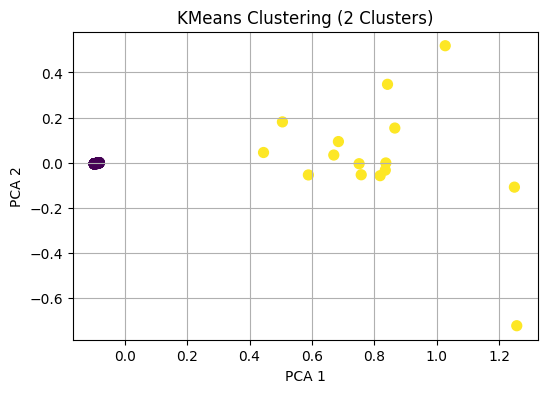

In [14]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 2.7311, Silhouette Score: 0.9343


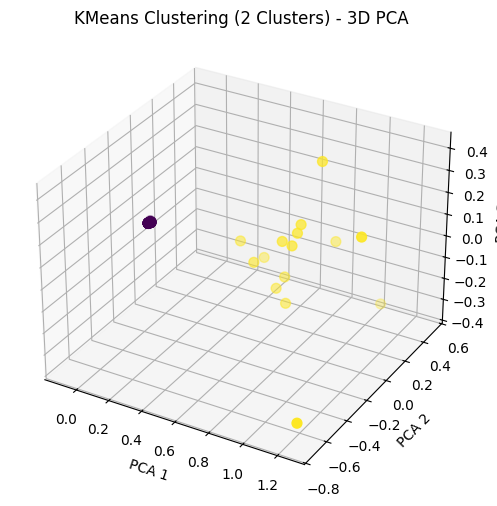

In [15]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan K-Means dengan 3 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 1.7686, Silhouette Score: 0.9351


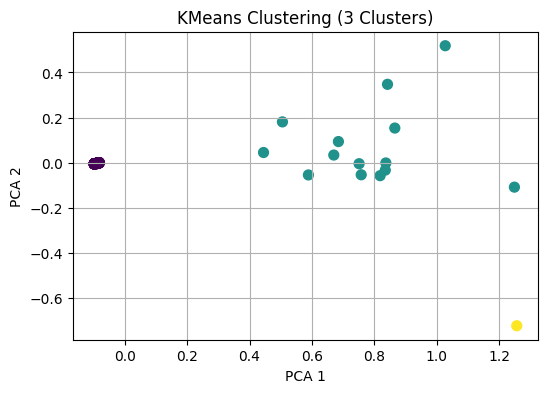

In [16]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 1.7686, Silhouette Score: 0.9351


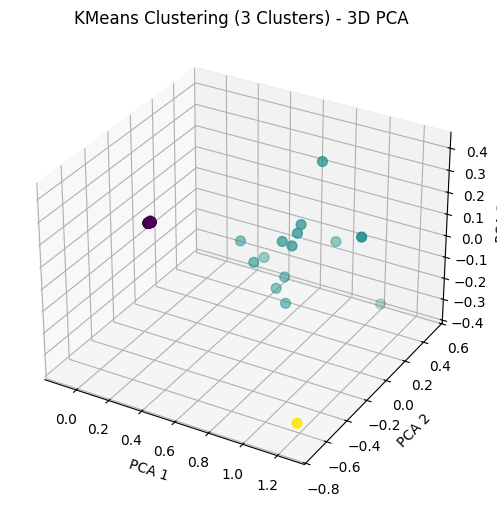

In [17]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan K-Means dengan 4 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 1.1564, Silhouette Score: 0.9210


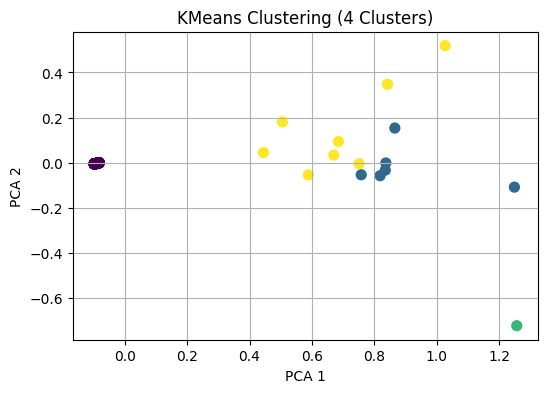

In [18]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 1.1564, Silhouette Score: 0.9210


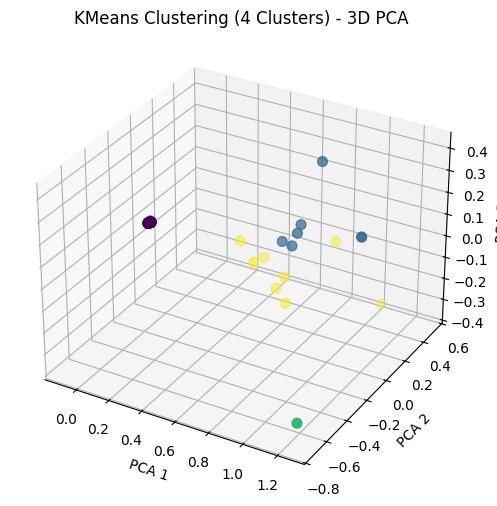

In [19]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
